In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

import os
import sys
import inspect

# code to manage where are lunch the file
if str(os.getcwd()).split("/")[-1] == "notebooks":
    sys.path.insert(1, os.path.realpath(os.path.pardir))
    path_b = "../"
else:
    path_b ='./'
import config as c

In [2]:
windows = c.windows
number_crypto = c.number_cryptos
market_cap = c.market_cap

df_name_index = pd.read_csv(f"{path_b}data/processed/first_{number_crypto}_crypto_list.csv", index_col=0)
df = pd.read_csv(f"{path_b}data/processed/market_cap_crypto.csv", index_col=0)

df_close_price = pd.read_csv(f'{path_b}data/processed/close_price_crypto.csv', index_col=0)
df_close_price['date'] = pd.to_datetime(df_close_price.index)
df_close_price['date'] = df_close_price['date'].dt.date
df_close_price.index = df_close_price['date']
del df_close_price['date']

# processing part Data

In [3]:
## use market cap file

df_market_cap = pd.read_csv(f'{path_b}data/processed/crypto_date_marketcap_1mio_sorted.csv', index_col=0)
df_market_cap = df_market_cap[df_market_cap.index != 95]

df_market_cap_first_20 = df_market_cap.iloc[:number_crypto]

#select last date
first_date = df_market_cap_first_20['first_date_marketcap_1mio'].tail(1).values

first_date_final = pd.to_datetime(first_date[0])

# TODO: change way to do it in the index
df_final_data = df_close_price.drop(df_close_price[df_close_price.index < first_date_final].index)
df_final_data = df_final_data[df_market_cap_first_20['crypto_name']]
df_final_data_return = df_final_data.pct_change().iloc[1:,:].fillna(0)
df_final_data_return

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,bitcoin,litecoin,ripple,nxt,dogecoin,digibyte,dash,monero,bitshares,stellar,verge,nem,ethereum,siacoin,decred,lisk,digixdao,steem,bytecoin-bcn,waves
date,,,,,,,,,,,,,,,,,,,,
2016-06-03,0.058036,0.030948,0.010577,-0.025518,0.032487,-0.020518,-0.004811,0.019987,0.006625,0.011526,0.063016,0.016109,0.007912,0.021483,-0.017569,0.237535,0.134758,-0.097288,-0.044547,-0.102411
2016-06-04,0.006207,-0.010889,-0.007965,0.015251,-0.005867,0.027382,-0.001790,0.030841,0.012490,-0.001876,-0.002074,0.004392,-0.007677,0.006596,0.011096,0.084243,-0.030910,0.156672,0.036120,-0.461672
2016-06-05,0.003929,0.001013,0.002709,0.002237,0.000258,-0.036010,-0.057814,0.029329,0.000674,-0.018706,-0.025893,-0.003711,0.017074,0.288953,-0.064894,0.103014,-0.001826,-0.127982,0.009479,0.214675
2016-06-06,0.018366,0.030387,-0.004591,-0.002530,-0.004573,-0.003619,0.025386,0.003938,-0.017556,-0.001475,0.052828,0.010026,-0.002927,0.043473,0.017863,-0.076713,-0.062619,0.041389,0.037366,0.078072
2016-06-07,-0.015268,-0.037986,0.001801,-0.011477,0.017051,0.313965,0.016992,-0.001857,0.024692,-0.005662,-0.202324,0.000727,0.041474,0.311158,0.006483,-0.071056,0.033266,-0.115271,-0.099306,0.087676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-13,0.024269,0.027955,0.024080,-0.013235,0.027978,0.012159,0.015025,-0.007989,0.054732,0.103626,0.018437,0.017043,0.032534,0.045729,-0.011512,0.034408,0.035003,0.080198,-0.002414,0.073210
2021-10-14,-0.001386,0.014018,0.003477,0.029762,-0.001287,0.004293,0.014698,-0.030941,0.051736,0.004524,0.036034,0.010034,0.049862,0.006881,-0.010868,0.033002,0.050502,0.024954,0.000398,0.012698
2021-10-15,0.074534,0.048278,0.007272,0.025513,0.006497,0.023845,0.039352,0.027274,0.021025,-0.021369,0.031137,-0.028193,0.020238,-0.022227,-0.020010,0.026891,0.022883,-0.077504,0.067400,-0.067306


In [4]:
#Long Asset with Low Vol
df_vol = df_final_data_return.rolling(windows).std().dropna()
returns_vol_quantile = df_vol.T.apply(lambda x: pd.qcut(x, 5, labels=False, duplicates="drop"), axis=0).T

In [5]:
for i in returns_vol_quantile.columns:
    returns_vol_quantile.loc[returns_vol_quantile[i] == 0, i] = 0.5 # First quantile for vol
    returns_vol_quantile.loc[returns_vol_quantile[i] == 1, i] = 0
    returns_vol_quantile.loc[returns_vol_quantile[i] == 2, i] = 0
    returns_vol_quantile.loc[returns_vol_quantile[i] == 3, i] = 0
    returns_vol_quantile.loc[returns_vol_quantile[i] == 4, i] = -0.5

## Low Vol part ##
returns_low_vol_quantile = returns_vol_quantile.replace(0.5,1)
returns_low_vol_quantile = returns_low_vol_quantile.replace(-0.5,0)
returns_low_vol_quantile['sum'] = returns_low_vol_quantile.sum(axis=1)

#better to do things => here Low Vol portfolio
# Do the same things about High vol
for i in tqdm(returns_low_vol_quantile.index):
    number = returns_low_vol_quantile['sum'].loc[i]
    for column in returns_low_vol_quantile.columns:
        returns_low_vol_quantile[column].loc[i] = returns_low_vol_quantile[column].loc[i] / number
del returns_low_vol_quantile['sum']

## High Vol part ##

returns_high_vol_quantile = returns_vol_quantile.replace(-0.5,1)
returns_high_vol_quantile = returns_high_vol_quantile.replace(0.5,0)
returns_high_vol_quantile['sum'] = returns_high_vol_quantile.sum(axis=1)

#better to do things => here Low Vol portfolio
# Do the same things about High vol
for i in tqdm(returns_high_vol_quantile.index):
    number = returns_high_vol_quantile['sum'].loc[i]
    for column in returns_high_vol_quantile.columns:
        returns_high_vol_quantile[column].loc[i] = returns_high_vol_quantile[column].loc[i] / number
del returns_high_vol_quantile['sum']

100%|██████████| 1724/1724 [00:11<00:00, 151.02it/s]


In [10]:
# TODO: debug return
df_final_data_return = df_final_data_return.loc[returns_low_vol_quantile.index,:]
low_vol_return = np.multiply(df_final_data_return, returns_low_vol_quantile)
low_vol_perf = np.sum(low_vol_return,1)
print(low_vol_perf)

high_vol_return = np.multiply(df_final_data_return, returns_high_vol_quantile)
high_vol_perf = np.sum(high_vol_return,1)

date
2016-09-30    0.007905
2016-10-01   -0.007760
2016-10-02   -0.003252
2016-10-03    0.006295
2016-10-04   -0.003026
                ...   
2021-10-13    0.019192
2021-10-14    0.007888
2021-10-15    0.042581
2021-10-16   -0.013499
2021-10-17    0.001627
Length: 1724, dtype: float64


date
2016-09-30      100.790476
2016-10-01      100.008353
2016-10-02       99.683109
2016-10-03      100.310606
2016-10-04      100.007065
                  ...     
2021-10-13    11694.575203
2021-10-14    11786.824226
2021-10-15    12288.717892
2021-10-16    12122.828508
2021-10-17    12142.550633
Length: 1724, dtype: float64
date
2016-09-30    1.004908e+02
2016-10-01    9.523942e+01
2016-10-02    9.764149e+01
2016-10-03    9.660133e+01
2016-10-04    9.296925e+01
                  ...     
2021-10-13    1.411656e+09
2021-10-14    1.430652e+09
2021-10-15    1.438487e+09
2021-10-16    1.436530e+09
2021-10-17    1.442277e+09
Length: 1724, dtype: float64


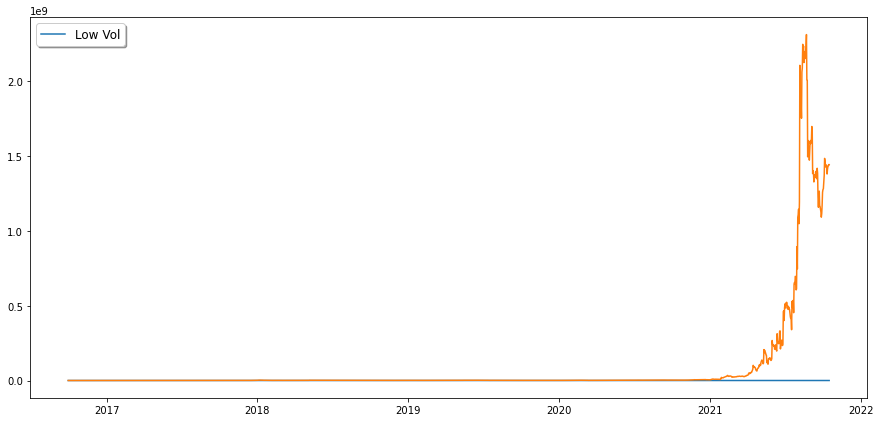

In [19]:
plt.figure(figsize=(15,7))
low_vol = (low_vol_perf+1).cumprod()*100
print(low_vol)


high_vol = (high_vol_perf+1).cumprod()*100
print(high_vol)

plt.plot(low_vol)
plt.plot(high_vol)
plt.legend(['Low Vol'],loc='upper left',fontsize='large',fancybox=True, shadow=True)
plt.show()